In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [2]:
df = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv")

In [3]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [6]:
df.drop(['RemovedTeeth','HadSkinCancer','DeafOrHardOfHearing','DeafOrHardOfHearing','DifficultyErrands','RaceEthnicityCategory'],axis =1,inplace = True)

In [7]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,No,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,No,No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [8]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [9]:
df.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

In [10]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


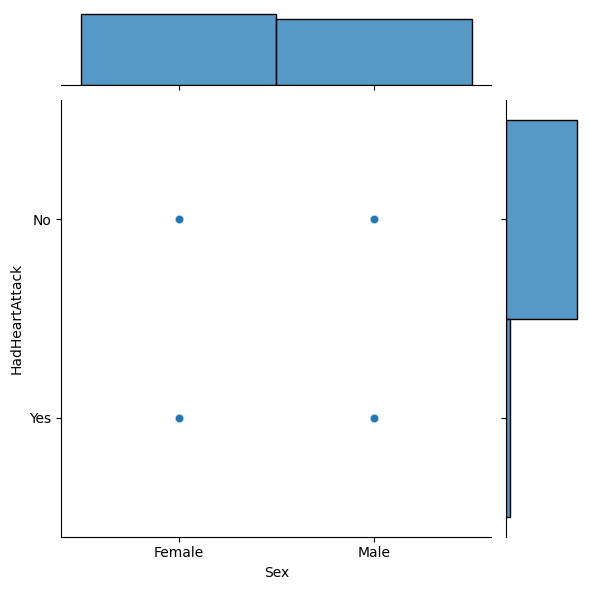

In [11]:
sns.jointplot(x = "Sex",y="HadHeartAttack",data=df,alpha = 0.5 )

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


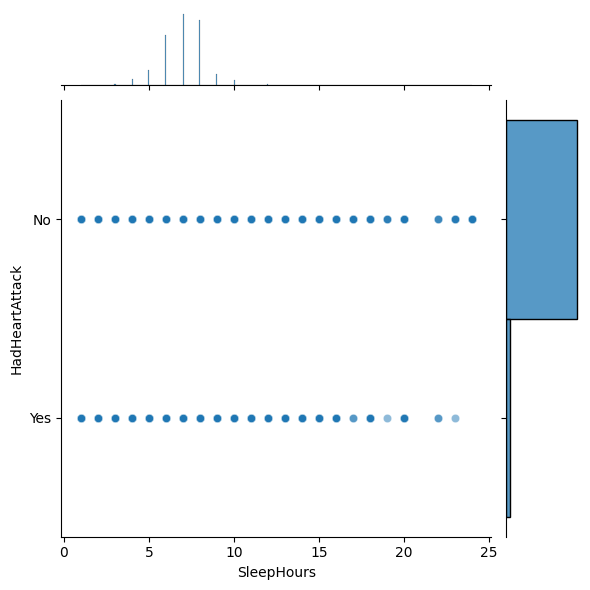

In [12]:
sns.jointplot(x = "SleepHours",y="HadHeartAttack",data=df,alpha = 0.5 )

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

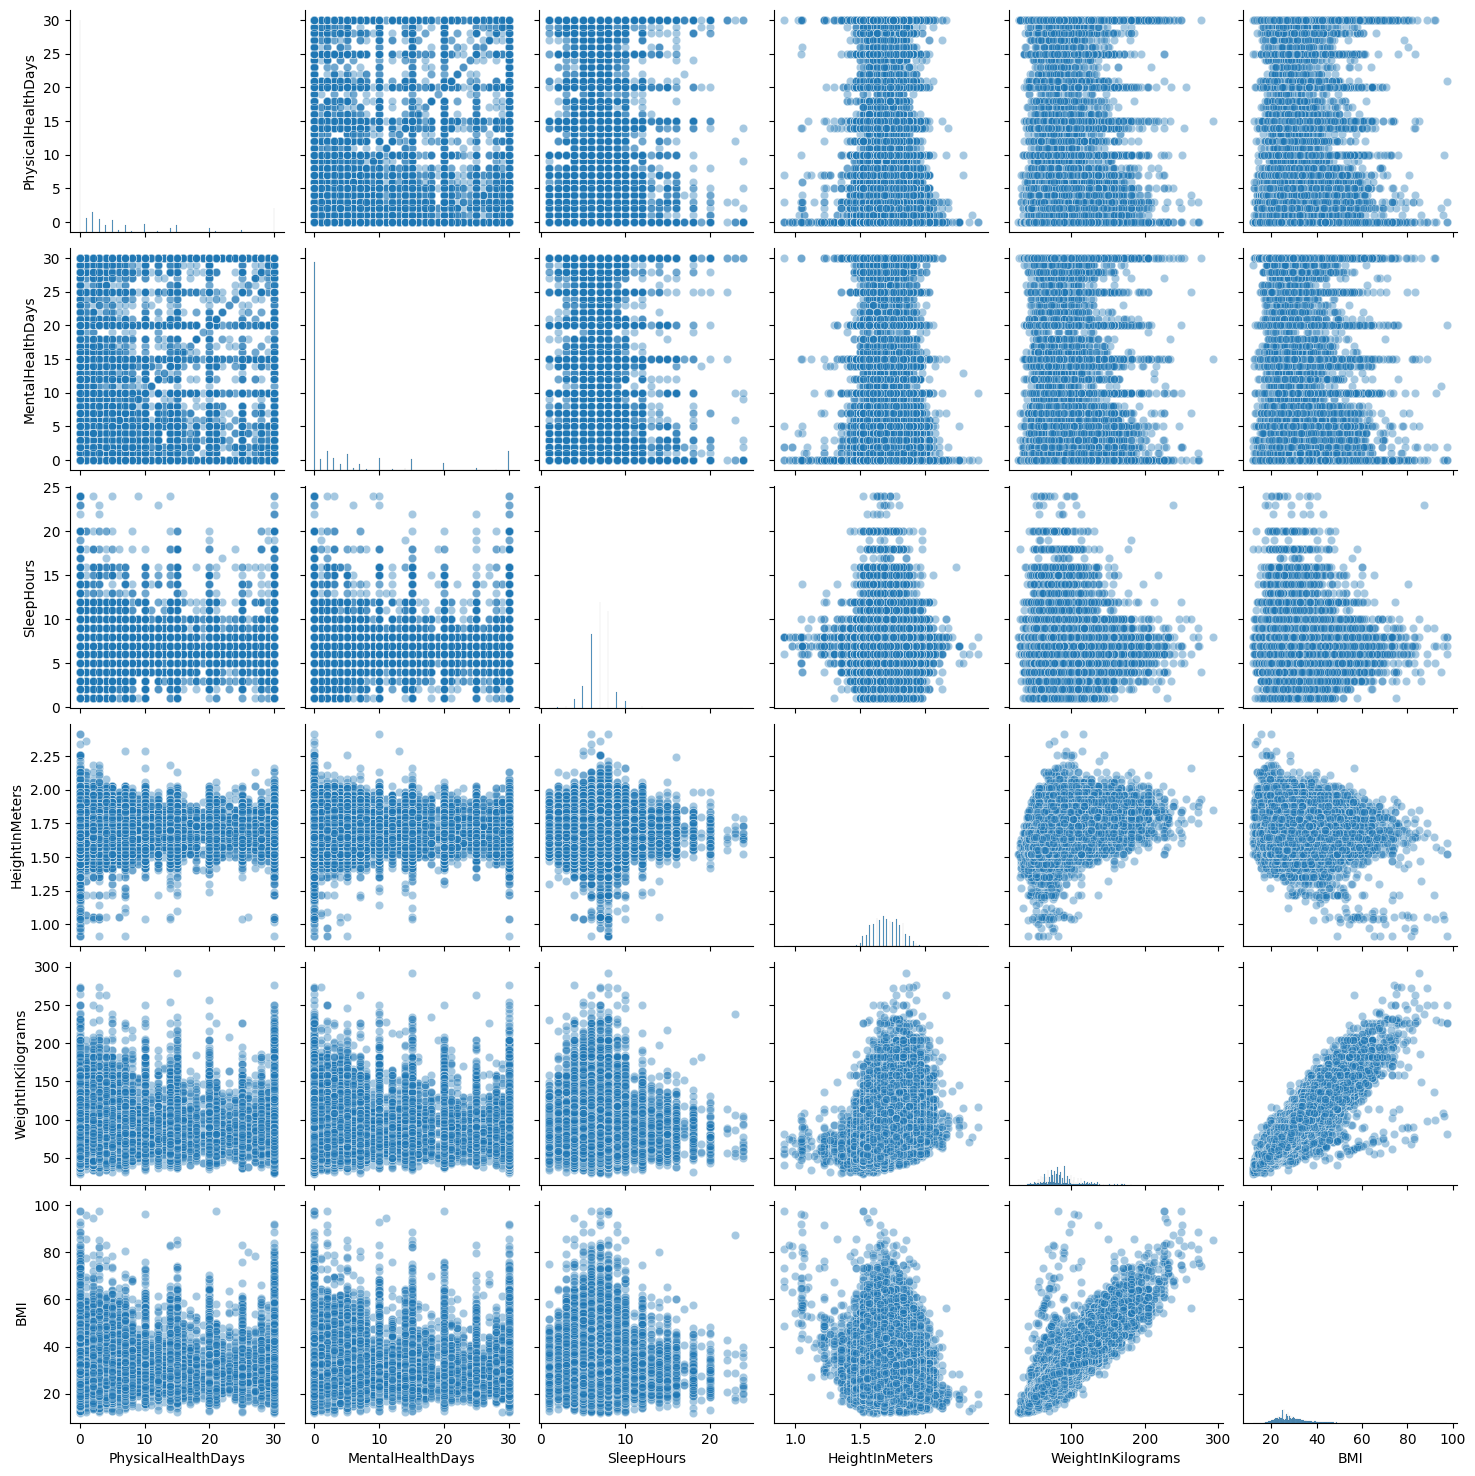

In [13]:
sns.pairplot(df,kind = "scatter",plot_kws={'alpha':0.4})

In [14]:
df['HadHeartAttack'] = df['HadHeartAttack'].replace({'No': 0, 'Yes': 1})

/tmp/ipykernel_13/226134721.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HadHeartAttack'] = df['HadHeartAttack'].replace({'No': 0, 'Yes': 1})


In [15]:
df.HadHeartAttack 

0         0
1         0
2         0
3         0
4         0
         ..
246017    0
246018    0
246019    0
246020    0
246021    1
Name: HadHeartAttack, Length: 246022, dtype: int64

In [16]:
df['HadHeartAttack'] = df['HadHeartAttack'].astype('category',copy = False)

<Axes: xlabel='HadHeartAttack'>

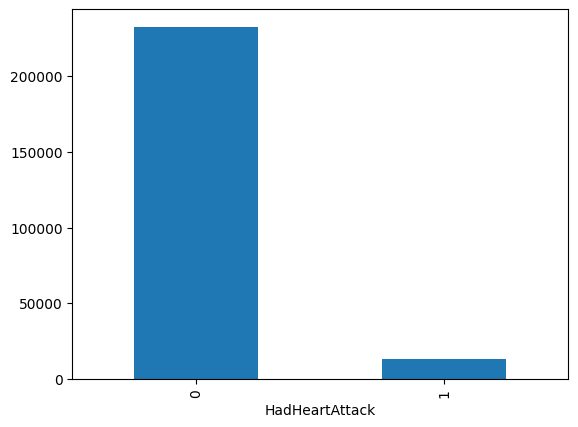

In [17]:
df['HadHeartAttack'].value_counts().plot(kind = 'bar')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State                      246022 non-null  object  
 1   Sex                        246022 non-null  object  
 2   GeneralHealth              246022 non-null  object  
 3   PhysicalHealthDays         246022 non-null  float64 
 4   MentalHealthDays           246022 non-null  float64 
 5   LastCheckupTime            246022 non-null  object  
 6   PhysicalActivities         246022 non-null  object  
 7   SleepHours                 246022 non-null  float64 
 8   HadHeartAttack             246022 non-null  category
 9   HadAngina                  246022 non-null  object  
 10  HadStroke                  246022 non-null  object  
 11  HadAsthma                  246022 non-null  object  
 12  HadCOPD                    246022 non-null  object  
 13  HadDepressiveD

In [19]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'AgeCategory', 'HeightInMeters',
       'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
       'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [20]:
y = df.HadHeartAttack

In [21]:
x = df.drop('HadHeartAttack',axis = 1)

In [22]:
x

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,No,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,No,No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,No,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,Yes,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [23]:
y

0         0
1         0
2         0
3         0
4         0
         ..
246017    0
246018    0
246019    0
246020    0
246021    1
Name: HadHeartAttack, Length: 246022, dtype: category
Categories (2, int64): [0, 1]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
x2 = pd.get_dummies(x)

x2_train,x2_test,y_train,y_test = train_test_split(x2,y,test_size = 0.3,stratify = y,random_state = 42)

In [25]:
x2_train

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,...,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
184108,0.0,0.0,6.0,1.63,61.23,23.17,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
240699,0.0,4.0,6.0,1.68,59.42,21.14,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
115741,0.0,2.0,6.0,1.75,81.65,26.58,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2455,1.0,0.0,7.0,1.55,90.72,37.79,False,True,False,False,...,True,False,True,False,False,True,False,True,False,False
29177,2.0,0.0,7.0,1.60,113.40,44.29,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81800,0.0,20.0,8.0,1.73,95.25,31.93,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
230773,0.0,0.0,6.0,1.80,108.86,33.47,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
58357,0.0,0.0,8.0,1.63,81.65,30.90,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
60120,2.0,0.0,6.0,1.57,65.77,26.52,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False


In [26]:
x2_test

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,...,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
170069,3.0,10.0,7.0,1.83,64.41,19.26,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
197214,0.0,0.0,7.0,1.65,81.65,29.99,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
210650,2.0,10.0,7.0,1.68,81.65,29.05,False,False,False,False,...,True,False,True,False,False,True,False,False,False,True
211223,0.0,0.0,7.0,1.80,90.72,27.89,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
195816,1.0,0.0,8.0,1.60,63.50,24.80,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112422,2.0,0.0,7.0,1.68,104.33,37.12,False,False,False,False,...,True,True,False,False,False,True,False,True,False,False
120728,30.0,3.0,5.0,1.70,108.86,37.59,False,False,False,False,...,True,True,False,False,False,True,False,True,False,False
121082,0.0,0.0,7.0,1.83,92.99,27.80,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
42353,2.0,28.0,6.0,1.78,86.18,27.26,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False


In [27]:
y_train

184108    0
240699    0
115741    0
2455      0
29177     0
         ..
81800     0
230773    0
58357     1
60120     0
168296    0
Name: HadHeartAttack, Length: 172215, dtype: category
Categories (2, int64): [0, 1]

In [28]:
y_test

170069    0
197214    0
210650    0
211223    0
195816    0
         ..
112422    0
120728    1
121082    0
42353     0
15412     0
Name: HadHeartAttack, Length: 73807, dtype: category
Categories (2, int64): [0, 1]

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(x2_train,y_train)
y_pred = lr.predict(x2_test)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [32]:
from sklearn.metrics import accuracy_score , classification_report
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy : .2f}")
print (classification_report(y_test,y_pred))

Accuracy :  0.95
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     69776
           1       0.54      0.26      0.35      4031

    accuracy                           0.95     73807
   macro avg       0.75      0.62      0.66     73807
weighted avg       0.94      0.95      0.94     73807

